<a href="https://colab.research.google.com/github/nadya-az/artificial_neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1

In [32]:
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, UpSampling2D, Input
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.datasets import cifar100
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, gray2rgb, rgb2gray
from skimage.transform import resize
from skimage.io import imsave
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
import os

#imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/imagenet-mini")))

In [33]:
(x_train, _), (x_test, _) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [34]:
gray_train = np.mean(x_train, axis=-1, keepdims=True)
gray_test = np.mean(x_test, axis=-1, keepdims=True)

In [35]:
x_train = x_train / 255.0
x_test = x_test / 255.0
gray_train = gray_train / 255.0
gray_test = gray_test / 255.0

In [51]:
def build_autoencoder():
    # Кодировщик
    input_shape = (32, 32, 1)
    inputs = Input(shape=input_shape)
    vgg19 = VGG19(include_top=False, weights='imagenet', input_tensor=inputs)
    for layer in vgg19.layers:
        layer.trainable = False
    encoded = vgg19.get_layer('block5_conv4').output

    decoded = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    decoded = UpSampling2D((2, 2))(decoded)
    decoded = Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
    decoded = UpSampling2D((2, 2))(decoded)
    decoded = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
    decoded = UpSampling2D((2, 2))(decoded)
    decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(decoded)
    decoded = UpSampling2D((2, 2))(decoded)
    decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(decoded)

    autoencoder = Model(inputs, decoded)

    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

In [52]:
gray_train = gray_train.reshape(gray_train.shape[0], gray_train.shape[1], gray_train.shape[2], 1)
gray_test = gray_test.reshape(gray_test.shape[0], gray_test.shape[1], gray_test.shape[2], 1)

In [53]:
model = build_autoencoder()
model.fit(gray_train, x_train, batch_size=32, epochs=10, validation_data=(gray_test, x_test))

80134624/80134624 [==============================] - 1s 0us/step


ValueError: ignored

In [3]:
for layer in newmodel.layers:
  layer.trainable=False

In [4]:
path = "/content/drive/MyDrive/imagenet-mini"

train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(224, 224), batch_size=100, class_mode=None)

print(train)

Found 38924 images belonging to 2 classes.


In [5]:
print(train[0].shape)

(100, 224, 224, 3)


In [6]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) # Значения A и B находятся в диапазоне от -127 до 128, 
      # поэтому мы делим значения на 128, чтобы ограничить значения от -1 до 1.
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #размерности должны быть одинаковыми для X и Y
print(X.shape)
print(Y.shape)

(100, 224, 224, 1)
(100, 224, 224, 2)


In [7]:
vvggfeatures = []
for i, sample in enumerate(X):
  sample = gray2rgb(sample)
  sample = sample.reshape((1,224,224,3))
  sample = keras.applications.vgg19.preprocess_input(sample)
  prediction = newmodel.predict(sample)
  prediction = prediction.reshape((14,14,512))
  vvggfeatures.append(prediction)
vggfeatures = np.array(vvggfeatures)
print(vggfeatures.shape)

1/1 [==============================] - 1s 655ms/step
(100, 14, 14, 512)


In [8]:
vggfeatures_val = []

for i, sample_val in enumerate(X):
  sample_val = gray2rgb(sample_val)
  sample_val = sample_val.reshape((1,224,224,3))
  sample_val = keras.applications.vgg19.preprocess_input(sample_val)
  prediction_val = newmodel.predict(sample_val)
  prediction_val = prediction_val.reshape((14,14,512))
  vggfeatures_val.append(prediction_val)
  print(i)
vggfeatures_val = np.array(vggfeatures_val)
print(vggfeatures_val.shape)


1/1 [==============================] - 1s 687ms/step
0
1/1 [==============================] - 1s 640ms/step
1
1/1 [==============================] - 1s 688ms/step
2
1/1 [==============================] - 1s 661ms/step
3
1/1 [==============================] - 1s 662ms/step
4
1/1 [==============================] - 1s 678ms/step
5
1/1 [==============================] - 1s 1s/step
6
1/1 [==============================] - 1s 1s/step
7
1/1 [==============================] - 1s 1s/step
8
1/1 [==============================] - 1s 654ms/step
9
1/1 [==============================] - 1s 654ms/step
10
1/1 [==============================] - 1s 667ms/step
11
1/1 [==============================] - 1s 664ms/step
12
1/1 [==============================] - 1s 643ms/step
13
1/1 [==============================] - 1s 657ms/step
14
1/1 [==============================] - 1s 655ms/step
15
1/1 [==============================] - 1s 643ms/step
16
1/1 [==============================] - 1s 671ms/step
17
1/1 [======

In [9]:
model = Sequential()

model.add(Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(14,14,512)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((1, 1)))
model.summary()


model.compile(optimizer='Adam', loss='mse' , metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 256)       1179904   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       295040    
                                                                 
 up_sampling2d (UpSampling2D  (None, 28, 28, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 up_sampling2d_1 (UpSampling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 32)       

In [10]:
model.fit(vggfeatures, Y, verbose=1, epochs=50, batch_size=100, validation_data=(vggfeatures_val, Y), validation_batch_size = 100)

model.save('/content/colorize_autoencoder_VGG19.h5')

Epoch 1/50
1/1 [==============================] - 20s 20s/step - loss: 0.9365 - accuracy: 0.5508 - val_loss: 0.9601 - val_accuracy: 0.3784
Epoch 2/50
1/1 [==============================] - 18s 18s/step - loss: 0.9601 - accuracy: 0.3784 - val_loss: 0.9611 - val_accuracy: 0.3746
Epoch 3/50
1/1 [==============================] - 17s 17s/step - loss: 0.9611 - accuracy: 0.3746 - val_loss: 0.9613 - val_accuracy: 0.3756
Epoch 4/50
1/1 [==============================] - 17s 17s/step - loss: 0.9613 - accuracy: 0.3756 - val_loss: 0.9615 - val_accuracy: 0.3768
Epoch 5/50
1/1 [==============================] - 24s 24s/step - loss: 0.9615 - accuracy: 0.3768 - val_loss: 0.9616 - val_accuracy: 0.3753
Epoch 6/50
1/1 [==============================] - 17s 17s/step - loss: 0.9616 - accuracy: 0.3753 - val_loss: 0.9616 - val_accuracy: 0.3754
Epoch 7/50
1/1 [==============================] - 24s 24s/step - loss: 0.9616 - accuracy: 0.3754 - val_loss: 0.9617 - val_accuracy: 0.3763
Epoch 8/50
1/1 [===========

In [11]:
model = tf.keras.models.load_model('/content/colorize_autoencoder_VGG19.h5',
                                   custom_objects=None,
                                   compile=True)

In [30]:
from google.colab.patches import cv2_imshow
import numpy as np

testpath = '/content/drive/MyDrive/dogs/'
files = os.listdir(testpath)
for idx, file in enumerate(files):

    test = img_to_array(load_img(testpath+file))
    orig = test.copy()

    test = resize(test, (224,224), anti_aliasing=True)
    test*= 1.0/255
    lab = rgb2lab(test)
    l = lab[:,:,0]
    L = gray2rgb(l)
    L = L.reshape((1,224,224,3))
    L = keras.applications.vgg19.preprocess_input(L)
    print(L.shape)
    vggpred = newmodel.predict(L)
    ab = model.predict(vggpred)
    print(ab.shape)
    ab = ab*128
    cur = np.zeros((224, 224, 3))
    cur[:,:,0] = l
    cur[:,:,1:] = ab
    imsave('/content/'+str(idx)+".jpg", lab2rgb(cur))

   # imo = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    #imo = cv2.resize(imo, (256, 256))

    #im = cv2.imread('/content/'+str(idx)+".jpg")
    #im = resize(im, (256, 256))
    #pred = np.concatenate((imo, im), axis=1)
    #cv2_imshow(pred)

(1, 224, 224, 3)
1/1 [==============================] - 0s 90ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 58ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 55ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 55ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 57ms/step


(1, 224, 224, 2)


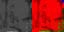

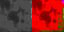

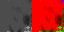

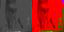

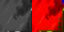

In [31]:
from google.colab.patches import cv2_imshow
import numpy as np

# def gray(image):
#   image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#   image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
#   return image


im_1 = cv2.imread("/content/0.jpg")
im_2 = cv2.imread("/content/1.jpg") 
im_3 = cv2.imread("/content/2.jpg")
im_4 = cv2.imread("/content/3.jpg")
im_5 = cv2.imread("/content/4.jpg")


# pred_1 = np.concatenate((gray(im_1), im_1), axis=1)
# pred_2 = np.concatenate((gray(im_2), im_2), axis=1)
# pred_3 = np.concatenate((gray(im_3), im_3), axis=1)
# pred_4 = np.concatenate((gray(im_4), im_4), axis=1)
# pred_5 = np.concatenate((gray(im_5), im_5), axis=1)


cv2_imshow(pred_4)  
cv2_imshow(pred_1)
cv2_imshow(pred_2)
cv2_imshow(pred_3)
cv2_imshow(pred_5)

Задание 2

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from imutils import paths


def preprocess(array):
    """
    Нормализует предоставленный массив и преобразует его в соответствующий формат.

    """
    array = np.array(array, dtype=np.float32)
    array = array / 255.0
    array = np.reshape(array, (len(array), 32, 32, 3))
    return array


def noise(array):
    """
    Добавляет случайный шум к каждому изображению в предоставленном массиве.

    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Отображает десять случайных изображений из каждого из предоставленных массивов.
    """

    n = 8

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(32, 32, 3))
        # plt.show()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(32, 32, 3))
        # plt.show()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
from pathlib import Path

imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/NighttimeDrivingTest/leftImg8bit/test/night")))
data = []

for imagePath in imagePaths:
  image = cv2.imread(imagePath) # загружаем изображение
  image = cv2.resize(image, (32, 32))
  data.append(image) # добавляем в список

In [ ]:

(train_X, test_X) = train_test_split(data, test_size=0.1, random_state=42)

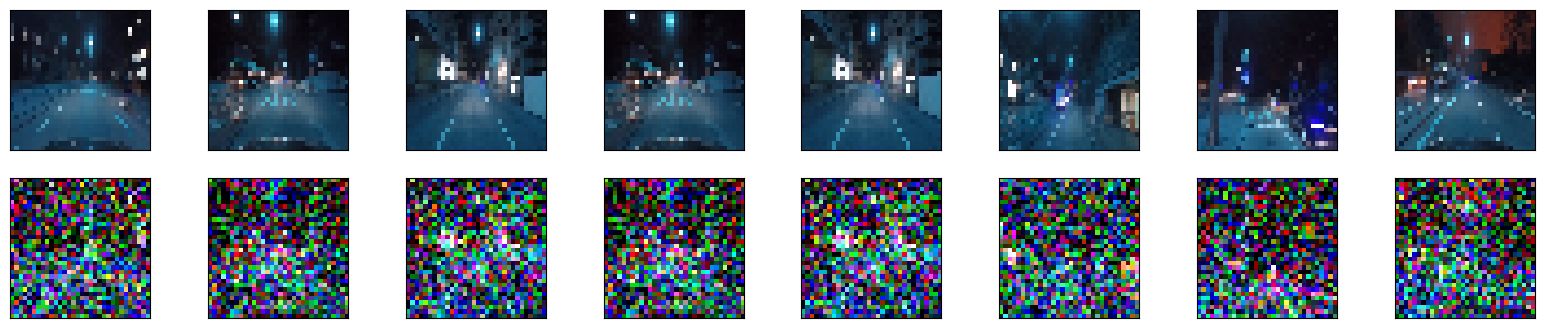

In [ ]:
train_X = preprocess(train_X)
test_X = preprocess(test_X)

noisy_train_X_data = noise(train_X)
noisy_test_X_data = noise(test_X)

display(train_X, noisy_train_X_data)

In [ ]:
train_X.shape

(45, 32, 32, 3)

In [ ]:
test_X.shape

(5, 32, 32, 3)

In [ ]:
noisy_train_X_data.shape

(45, 32, 32, 3)

In [ ]:
noisy_test_X_data.shape

(5, 32, 32, 3)

In [ ]:
input = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="linear", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 16)       9232      
 nspose)                                                         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 3)         435       
                                                                 
Total params: 11,459
Trainable params: 11,459
Non-trainable p

In [ ]:
autoencoder.fit(
    x=train_X,
    y=train_X,
    epochs=150,
    batch_size=100,
    shuffle=True,
    validation_data=(test_X, test_X),
)

Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0691 - val_loss: 0.0474
Epoch 2/150
1/1 [==============================] - 1s 598ms/step - loss: 0.0643 - val_loss: 0.0445
Epoch 3/150
1/1 [==============================] - 0s 406ms/step - loss: 0.0606 - val_loss: 0.0419
Epoch 4/150
1/1 [==============================] - 0s 270ms/step - loss: 0.0573 - val_loss: 0.0395
Epoch 5/150
1/1 [==============================] - 0s 265ms/step - loss: 0.0541 - val_loss: 0.0370
Epoch 6/150
1/1 [==============================] - 0s 247ms/step - loss: 0.0509 - val_loss: 0.0345
Epoch 7/150
1/1 [==============================] - 0s 243ms/step - loss: 0.0475 - val_loss: 0.0318
Epoch 8/150
1/1 [==============================] - 0s 275ms/step - loss: 0.0439 - val_loss: 0.0289
Epoch 9/150
1/1 [==============================] - 0s 243ms/step - loss: 0.0401 - val_loss: 0.0260
Epoch 10/150
1/1 [==============================] - 0s 234ms/step - loss: 0.0362 - val_loss: 0.0231
Epoch 11/150

1/1 [==============================] - 0s 264ms/step


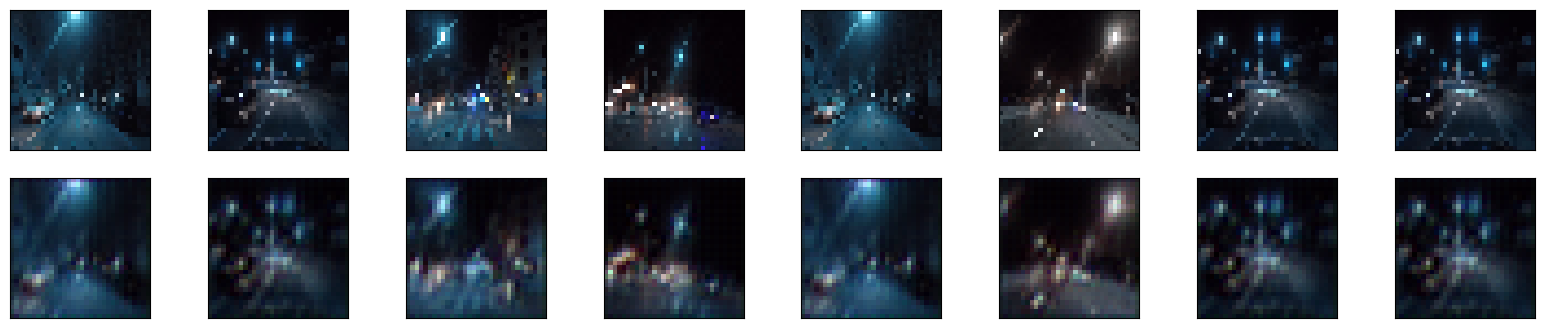

In [ ]:
predictions = autoencoder.predict(test_X)
display(test_X, predictions)

In [ ]:
autoencoder.fit(
    x=noisy_train_X_data,
    y=train_X,
    epochs=100,
    batch_size=100,
    shuffle=True,
    validation_data=(noisy_test_X_data, test_X),
)

Epoch 1/100
1/1 [==============================] - 0s 197ms/step - loss: 0.0268 - val_loss: 0.0187
Epoch 2/100
1/1 [==============================] - 0s 143ms/step - loss: 0.0198 - val_loss: 0.0181
Epoch 3/100
1/1 [==============================] - 0s 168ms/step - loss: 0.0206 - val_loss: 0.0163
Epoch 4/100
1/1 [==============================] - 0s 253ms/step - loss: 0.0180 - val_loss: 0.0176
Epoch 5/100
1/1 [==============================] - 0s 184ms/step - loss: 0.0185 - val_loss: 0.0196
Epoch 6/100
1/1 [==============================] - 0s 171ms/step - loss: 0.0203 - val_loss: 0.0177
Epoch 7/100
1/1 [==============================] - 0s 184ms/step - loss: 0.0187 - val_loss: 0.0153
Epoch 8/100
1/1 [==============================] - 0s 181ms/step - loss: 0.0169 - val_loss: 0.0148
Epoch 9/100
1/1 [==============================] - 0s 175ms/step - loss: 0.0169 - val_loss: 0.0144
Epoch 10/100
1/1 [==============================] - 0s 174ms/step - loss: 0.0163 - val_loss: 0.0137
Epoch 11/

1/1 [==============================] - 0s 31ms/step


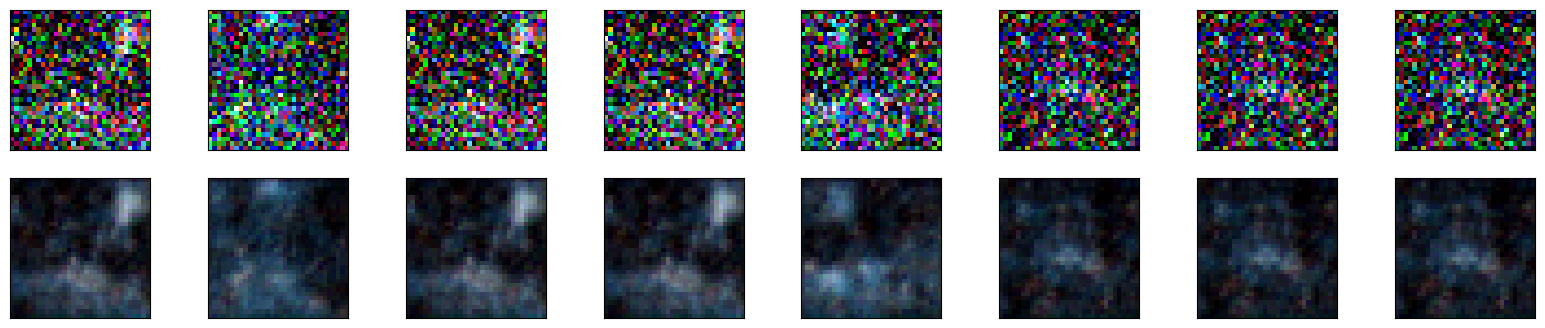

In [ ]:
predictions = autoencoder.predict(noisy_test_X_data)
display(noisy_test_X_data, predictions)

Задание 3

In [ ]:
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, UpSampling2D, Input
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, gray2rgb, rgb2gray
from skimage.transform import resize
from skimage.io import imsave
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
import os

imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/NighttimeDrivingTest/leftImg8bit/test/night")))

In [ ]:
datas1 = []

for imagePath1 in imagePaths:
  image1 = cv2.imread(imagePath1)
  image1 = cv2.resize(image1, (128, 128))
  datas1.append(image1) 

In [ ]:
datas2 = []
for imagePath2 in imagePaths:
  image2 = cv2.imread(imagePath2)
  image2 = cv2.resize(image2, (256, 256))
  datas2.append(image2) 

In [ ]:
datas2[0].shape

(256, 256, 3)

In [ ]:
datas1[0].shape

(128, 128, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datas1, datas2, test_size=0.2, random_state=42)

In [ ]:
def preprocess1(array1): #Создаем функцию с параметром array1

    array1 = np.array(array1, dtype=np.float32)
    array1 = array1 / 255.0
    array1 = np.reshape(array1, (len(array1), 128, 128, 3))
    return array1

In [ ]:
def preprocess2(array2): #Создаем функцию с параметром array2

    array2 = np.array(array2, dtype=np.float32) # Cоздаем массив
    array2 = array2 / 255.0
    array2 = np.reshape(array2, (len(array2), 256, 256, 3)) #Устанавливаем размер
    return array2

In [ ]:
x_train = preprocess1(x_train)#помещаем
x_test = preprocess1(x_test)
y_train = preprocess2(y_train)
y_test = preprocess2(y_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40, 128, 128, 3)
(40, 256, 256, 3)
(10, 128, 128, 3)
(10, 256, 256, 3)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

input1 = layers.Input(shape=(128, 128, 3))

# Encoder
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(input1)
x = layers.MaxPooling2D((2, 2), padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="linear", padding="same")(x)


auto = Model(input1, x)
auto.compile(optimizer="adam", loss="mse", metrics = ["mse", "accuracy"])
auto.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 128, 128, 16)     18448     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 256, 256, 32)     4640      
 ranspose)                                                       
                                                           

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40, 128, 128, 3)
(40, 256, 256, 3)
(10, 128, 128, 3)
(10, 256, 256, 3)


In [ ]:
import tensorflow as tf

In [ ]:
history = auto.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=20,
    shuffle=True,
    validation_data = (x_test, y_test),
    )

Epoch 1/5
2/2 [==============================] - 12s 5s/step - loss: 0.0590 - mse: 0.0590 - accuracy: 0.2531 - val_loss: 0.0503 - val_mse: 0.0503 - val_accuracy: 0.2174
Epoch 2/5
2/2 [==============================] - 10s 6s/step - loss: 0.0526 - mse: 0.0526 - accuracy: 0.2210 - val_loss: 0.0424 - val_mse: 0.0424 - val_accuracy: 0.2423
Epoch 3/5
2/2 [==============================] - 8s 4s/step - loss: 0.0434 - mse: 0.0434 - accuracy: 0.2532 - val_loss: 0.0317 - val_mse: 0.0317 - val_accuracy: 0.2711
Epoch 4/5
2/2 [==============================] - 10s 5s/step - loss: 0.0313 - mse: 0.0313 - accuracy: 0.2757 - val_loss: 0.0201 - val_mse: 0.0201 - val_accuracy: 0.2842
Epoch 5/5
2/2 [==============================] - 9s 5s/step - loss: 0.0194 - mse: 0.0194 - accuracy: 0.2859 - val_loss: 0.0138 - val_mse: 0.0138 - val_accuracy: 0.3119


In [ ]:
test_img = x_test[0]

test_img = np.reshape(test_img, (1, 128, 128, 3))

In [ ]:
test_pred = auto.predict(test_img)

1/1 [==============================] - 0s 314ms/step


In [ ]:
test_img = test_img[0,]
test_pred = test_pred[0,]

In [ ]:
np.unique(test_pred)

array([-0.01673851, -0.01505281, -0.01335861, ...,  1.1968307 ,
        1.198568  ,  1.2026715 ], dtype=float32)

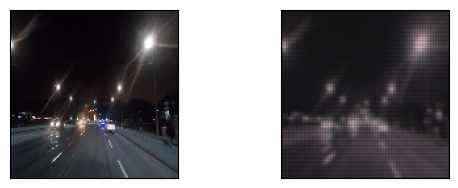

In [ ]:
ax = plt.subplot(2, 2, 1)
plt.imshow(test_img)
        # plt.show()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 2, 2)
plt.imshow(test_pred)
        # plt.show()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()